<a href="https://colab.research.google.com/github/shreeyanshi123/My-Repo/blob/main/Cat_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 24.9MB/s]
100% 1.06G/1.06G [00:49<00:00, 22.9MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from keras.models import Sequential

In [5]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalize
def process(image,label):
  image=tensorflow.cast(image/255.,tensorflow.float32)
  return image,label

train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [16]:
#create a CNN model
model=Sequential()

model.add(Conv2D(32,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))


model.add(Conv2D(64,(3,3),1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,(3,3),1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 71s 107ms/step - loss: 1.4775 - accuracy: 0.6035 - val_loss: 0.6491 - val_accuracy: 0.6820
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5543 - accuracy: 0.7164 - val_loss: 0.6198 - val_accuracy: 0.6266
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4824 - accuracy: 0.7728 - val_loss: 1.0643 - val_accuracy: 0.5322
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4257 - accuracy: 0.8057 - val_loss: 0.6634 - val_accuracy: 0.6718
Epoch 5/10
625/625 [==============================] - 68s 107ms/step - loss: 0.3512 - accuracy: 0.8454 - val_loss: 0.4618 - val_accuracy: 0.8010
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2787 - accuracy: 0.8812 - val_loss: 0.7462 - val_accuracy: 0.7764
Epoch 7/10
625/625 [==============================] - 64s 103ms/step - loss: 0.2056 - accuracy: 0.9158 - val_loss: 0.6234 - val_ac

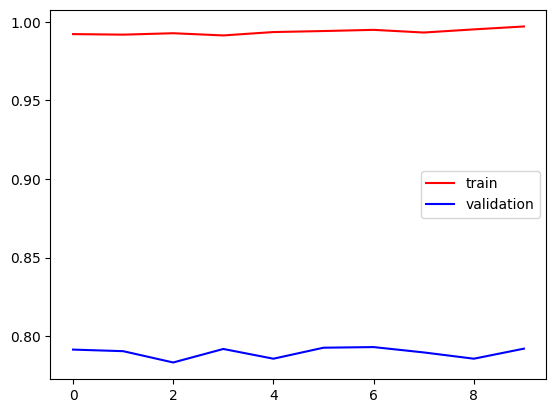

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

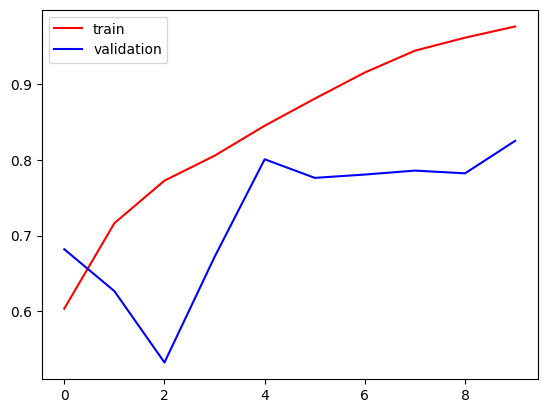

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

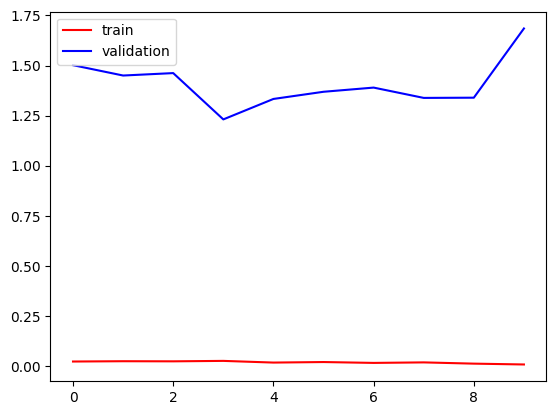

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


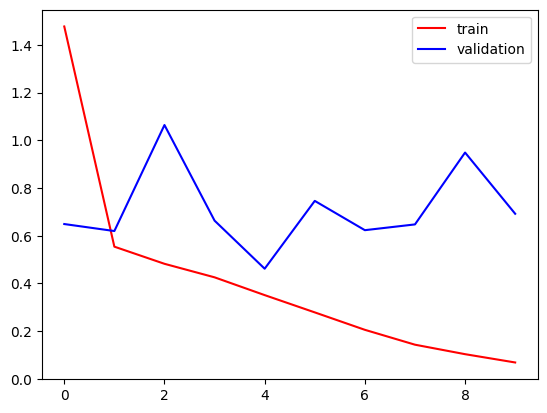

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [14]:
loss,accuracy=model.evaluate(test_ds)
print(accuracy)
print(loss)

157/157 [==============================] - 12s 70ms/step - loss: 1.6848 - accuracy: 0.7920
0.7919999957084656
1.6848160028457642


In [22]:
loss_,accuracy_=model.evaluate(test_ds)
print(accuracy_)
print(loss_)

157/157 [==============================] - 9s 53ms/step - loss: 0.6922 - accuracy: 0.8254
0.8253999948501587
0.6922425031661987


In [23]:
import cv2

In [28]:
img=cv2.imread('/content/dog.jpg')

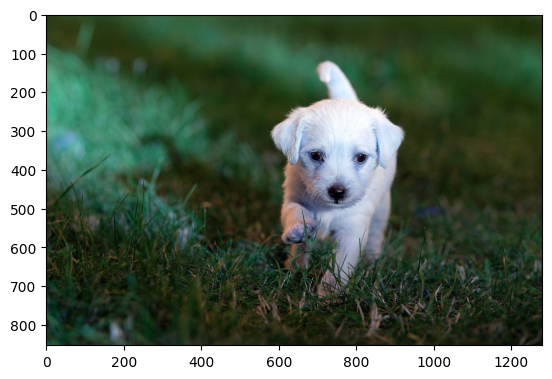

In [29]:
plt.imshow(img)

In [30]:
img.shape

(853, 1280, 3)

In [31]:
img=cv2.resize(img,(256,256))

In [32]:
test_input=img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 397ms/step


array([[1.]], dtype=float32)

In [34]:
img2=cv2.imread('/content/cat.jpg')

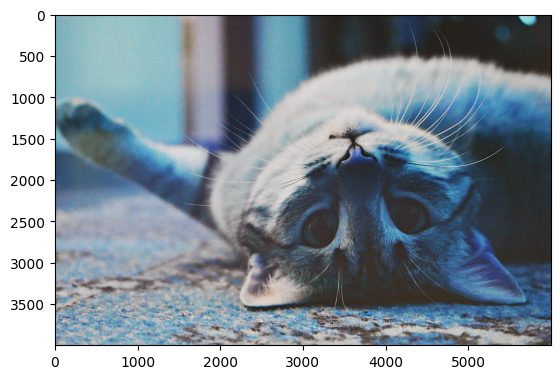

In [35]:
plt.imshow(img2)

In [36]:
tst_inp=cv2.resize(img2,(256,256))

In [37]:
model.predict(tst_inp.reshape((1,256,256,3)))

1/1 [==============================] - 0s 31ms/step


array([[0.]], dtype=float32)